In [1]:
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#sudo pip install mcareader
import mcareader as mca

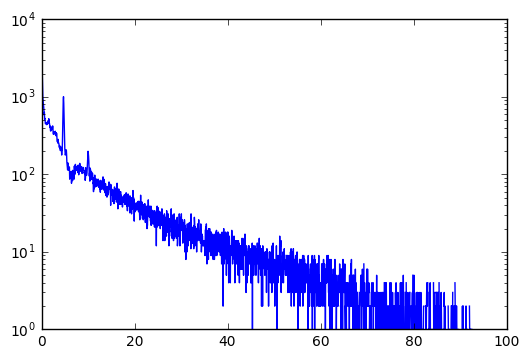

In [3]:
s = mca.Mca("demo.mca");
s.plot(log_y=True);

/home/guillehg/Dropbox/Thesis/9PileUp/mcareader/mcareader.py:116: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return lambda x: slope * x + intercept


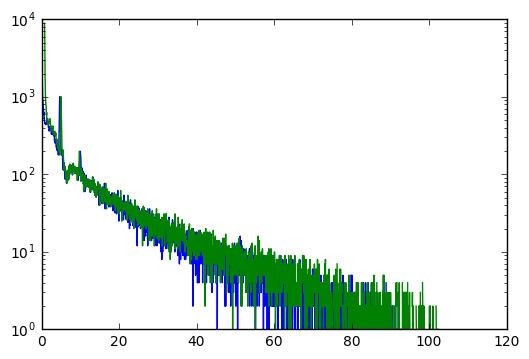

In [4]:
#Get the points using different calibration methods. Both are linear.
x, y = s.get_points(calibration_method="interpolation")
x2, y2 = s.get_points(calibration_method="bestfit")
plt.semilogy(x,y)
plt.semilogy(x2,y2)
plt.show() #

In [5]:
#Get some data
real_time = float(s.get_variable("REAL_TIME"))
print(real_time)

100.0
